In [112]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Во всех трех датасетах нет пропусков и дубликатов

In [115]:
# Функция для построения графика распределения
def plot_distribution(data, column_name):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column_name], kde=True)
    plt.title(f'Распределение {column_name} в регионе')
    plt.xlabel(column_name)
    plt.ylabel('Частота')
    plt.show()

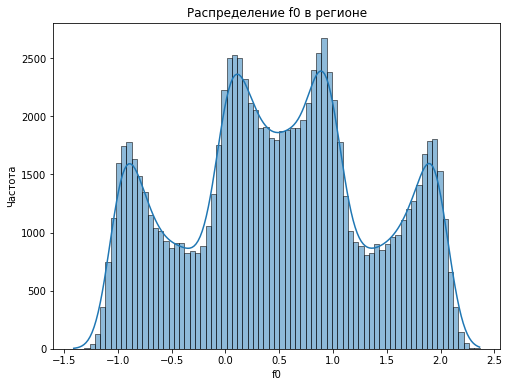

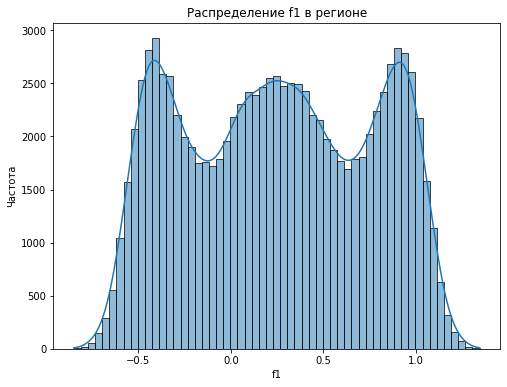

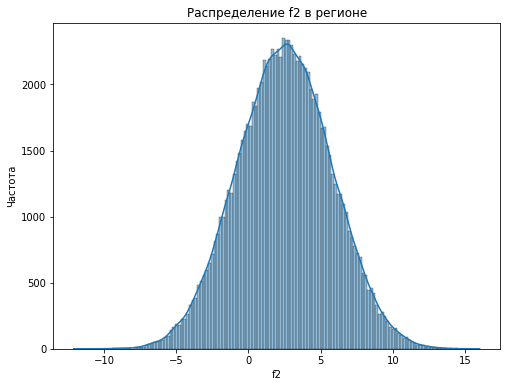

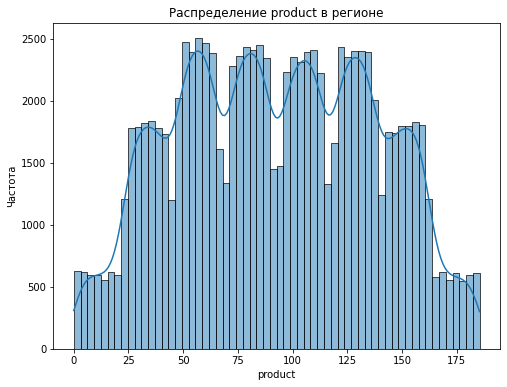

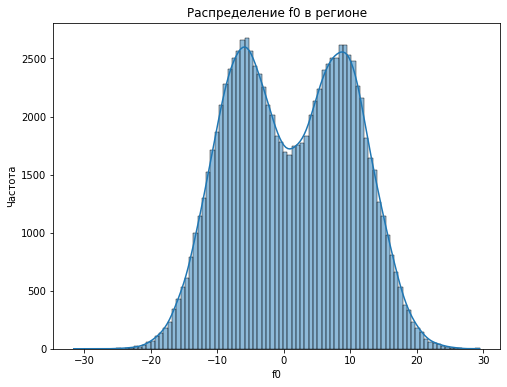

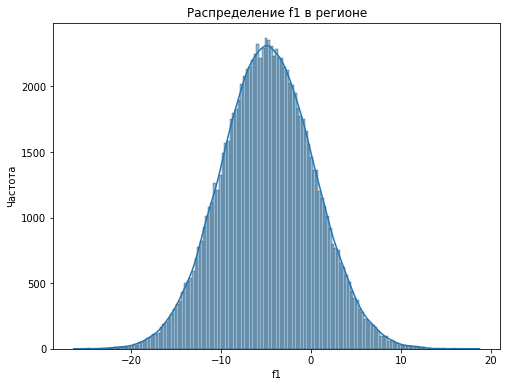

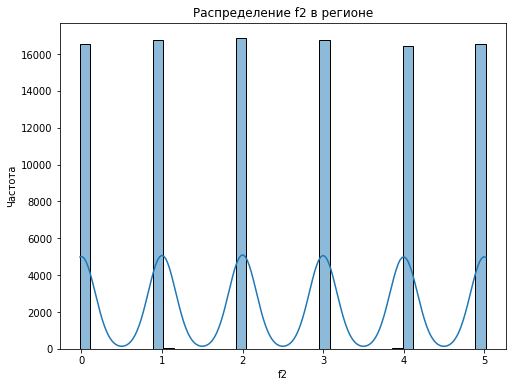

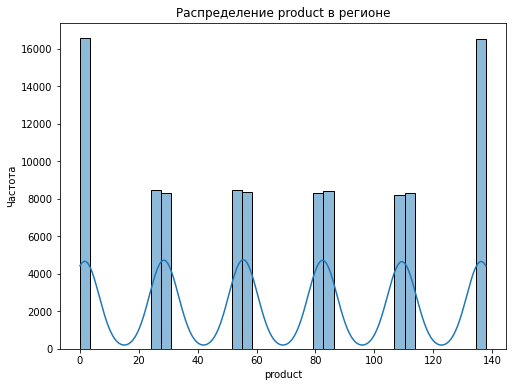

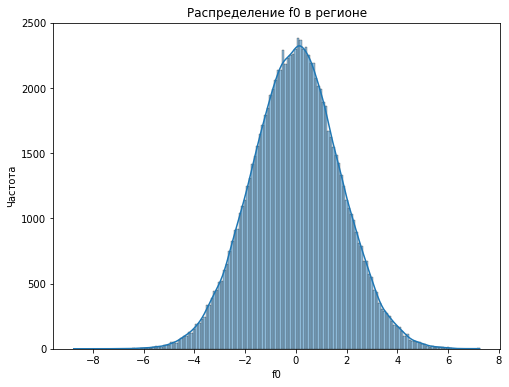

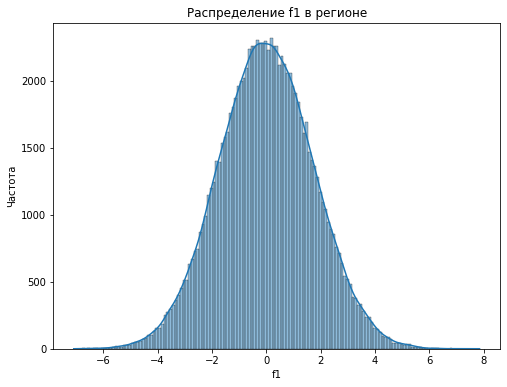

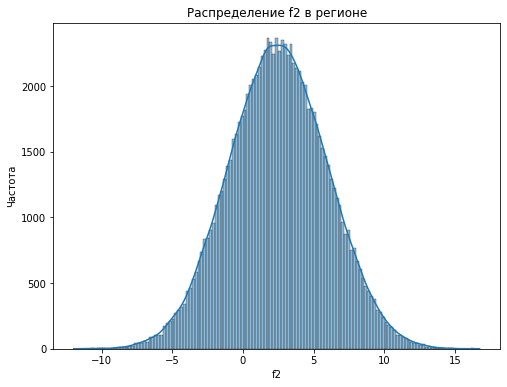

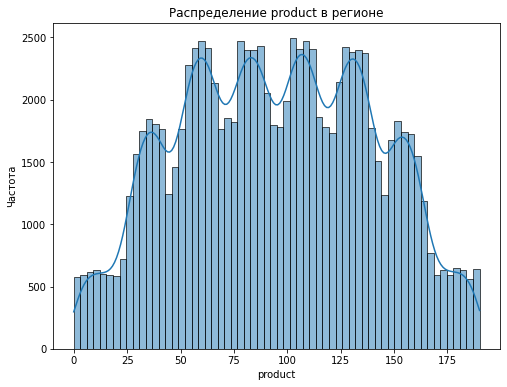

In [116]:
# Построение графиков распределения для каждого региона
columns_to_plot = ['f0', 'f1', 'f2','product']
for i, data in enumerate([data_0, data_1, data_2]):
    for column in columns_to_plot:
        plot_distribution(data, column)
        
        

In [117]:
def calculate_correlation_matrices(data_list):
    correlation_matrices = []
    for i, data in enumerate(data_list):
        corr_matrix = data.corr()
        print(f"Correlation Matrix for Region {i}:")
        print(corr_matrix)
        correlation_matrices.append(corr_matrix)
    return correlation_matrices

correlation_matrices = calculate_correlation_matrices([data_0, data_1, data_2])


Correlation Matrix for Region 0:
               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000
Correlation Matrix for Region 1:
               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000
Correlation Matrix for Region 2:
               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000


## Обучение и проверка модели

In [141]:


X = data_0[['f0', 'f1', 'f2']]  # Признаки
y = data_0['product']  # Целевая переменная

X_train_0, X_val_0, y_train_0, y_val_0 = train_test_split(X, y, test_size=0.25, random_state=42)


In [142]:
# пайплайн № 1
preprocessing = ColumnTransformer(
    [
        ('num', MinMaxScaler(), ['f0', 'f1', 'f2'])
    ], 
    remainder='passthrough'
)

# пайплайн № 2
final_p = Pipeline(
    [
        ('preprocessor', preprocessing),
        ('models', LinearRegression())
    ]
)





In [143]:
final_p.fit(X_train_0, y_train_0)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['f0', 'f1', 'f2'])])),
                ('models', LinearRegression())])

In [144]:
y_pred_0 = final_p.predict(X_val_0)

In [145]:
# Вычисляем MSE
mse = mean_squared_error(y_val_0, y_pred_0)

# Переводим MSE в RMSE
rmse = sqrt(mse)
print(rmse)

37.75660035026169


In [146]:
y_pred_0

array([101.90101715,  78.21777385, 115.26690103, ...,  82.54439653,
        81.82668931,  93.12106221])

In [147]:


X = data_1[['f0', 'f1', 'f2']]  # Признаки
y = data_1['product']  # Целевая переменная

X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X, y, test_size=0.25, random_state=42)


In [148]:
final_p.fit(X_train_1, y_train_1)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['f0', 'f1', 'f2'])])),
                ('models', LinearRegression())])

In [149]:
y_pred_1 = final_p.predict(X_val_1)

In [150]:
# Вычисляем MSE
mse = mean_squared_error(y_val_1, y_pred_1)

# Переводим MSE в RMSE
rmse = sqrt(mse)
print(rmse)

0.8902801001028844


In [151]:
y_pred_1

array([  0.84473806,  52.92161194, 135.11038454, ...,  26.70873415,
       109.82308735, 135.44878039])

In [152]:


X = data_2[['f0', 'f1', 'f2']]  # Признаки
y = data_2['product']  # Целевая переменная

X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X, y, test_size=0.25, random_state=42)


In [153]:
final_p.fit(X_train_2, y_train_2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['f0', 'f1', 'f2'])])),
                ('models', LinearRegression())])

In [154]:
y_pred_2 = final_p.predict(X_val_2)

In [155]:
# Вычисляем MSE
mse = mean_squared_error(y_val_2, y_pred_2)

# Переводим MSE в RMSE
rmse = sqrt(mse)
print(rmse)

40.14587231134218


In [156]:
y_pred_2

array([ 98.30191642, 101.59246124,  52.4490989 , ...,  64.09839   ,
        83.76413542,  86.55864415])

In [157]:
print(y_pred_0.mean())
print(y_pred_1.mean())
print(y_pred_2.mean())

92.39879990657768
68.71287803913762
94.77102387765939


In [158]:
print(data_0['product'].mean())
print(data_1['product'].mean())
print(data_2['product'].mean())

92.50000000000001
68.82500000000002
95.00000000000004


## Подготовка к расчёту прибыли

In [159]:
BUDGET_PER_WELL = 10e9# 10 млрд рублей
INCOME_PER_BARREL = 450000 *200 # 450 рублей за баррель
# Безубыточный объем сырья для одной скважины
BREAK_EVEN_VOLUME_PER_WELL = BUDGET_PER_WELL / INCOME_PER_BARREL
print(f"Безубыточный объем сырья для одной скважины: {BREAK_EVEN_VOLUME_PER_WELL} тыс. баррелей")


Безубыточный объем сырья для одной скважины: 111.11111111111111 тыс. баррелей


Средний запас каждого из регионов меньше, чем достаточный объём сырья для безубыточной разработки новой скважины

Вывод:в новом регионе необходимо найти и отобрать месторождения с лучшими показателями

## Расчёт прибыли и рисков 

In [160]:
print(len(y_pred_0))
print(len(y_pred_1))
len(y_pred_2)

25000
25000


25000

In [161]:
def calculate_profit_for_best_wells(real_values, predicted_values, break_even_volume, income_per_barrel):
    # Выбираем топ-200 скважин по предсказанным значениям
    top_wells = predicted_values.nlargest(200).index
    
    # Получаем реальные значения для выбранных скважин
    selected_real_values = real_values.loc[top_wells]
    
    # Рассчитываем общий объем сырья для выбранных скважин
    total_volume = selected_real_values.sum()
    
    # Рассчитываем прибыль
    profit = (total_volume - len(top_wells) * break_even_volume) * income_per_barrel
    
    return profit


In [162]:
def bootstrap_profits_and_risks(real_values, predicted_values, n_bootstrap=1000):
    profits = []
    for _ in range(n_bootstrap):
        # Семплируем 500 случайных скважин
        sampled_indices = np.random.choice(len(real_values), size=500, replace=False)
        
        # Выбираем соответствующие реальные и предсказанные значения
        sampled_real_values = real_values.iloc[sampled_indices]
        sampled_predicted_values = predicted_values.iloc[sampled_indices]
        
        # Рассчитываем прибыль для семпла
        profit = calculate_profit_for_best_wells(sampled_real_values, sampled_predicted_values, BREAK_EVEN_VOLUME_PER_WELL , INCOME_PER_BARREL)
        profits.append(profit)
    
    profits = np.array(profits)
    mean_profit = profits.mean()
    ci_lower, ci_upper = np.percentile(profits, [2.5, 97.5])
    risk_of_loss = (profits < 0).mean()
    
    return mean_profit, ci_lower, ci_upper, risk_of_loss


In [163]:
for i, region_data in enumerate([data_0, data_1, data_2]):
    real_values = region_data['product']
    predicted_values = pd.Series(final_p.predict(region_data[['f0', 'f1', 'f2']]))
    
    mean_profit, ci_lower, ci_upper, risk_of_loss = bootstrap_profits_and_risks(real_values, predicted_values)
    print(f"Region {i}: Mean Profit = {mean_profit}, CI = [{ci_lower}, {ci_upper}], Risk of Loss = {risk_of_loss}")


Region 0: Mean Profit = 58126910240.64348, CI = [-45405115340.058266, 159118918080.19498], Risk of Loss = 0.133
Region 1: Mean Profit = 89813368861.15234, CI = [11323971648.002096, 169325542810.7167], Risk of Loss = 0.014
Region 2: Mean Profit = 72654420518.02895, CI = [-28797243387.983715, 168638183059.4453], Risk of Loss = 0.085


Анализ результатов
Регион 0 показывает среднюю прибыль в размере примерно 55.02 млрд рублей, однако с довольно широким доверительным интервалом, который даже включает отрицательные значения. Это указывает на высокий уровень неопределенности в прогнозах для этого региона. Кроме того, риск убытков составляет 14%, что превышает установленный порог в 2.5%.
Регион 1 демонстрирует наиболее привлекательные результаты с точки зрения средней ожидаемой прибыли, которая составляет около 87.27 млрд рублей, и низким риском убытков, равным 1.9%. Доверительный интервал также положительный, что говорит о меньшей степени неопределенности по сравнению с другими регионами.
Регион 2 имеет среднюю ожидаемую прибыль в размере примерно 74.66 млрд рублей, что находится между результатами первого и второго регионов. Однако риск убытков в этом регионе составляет 7%, что также превышает установленный порог.
Выводы и рекомендации
Исходя из анализа, Регион 1 представляет собой наиболее перспективный вариант для разработки скважин. Он не только обеспечивает наивысшую среднюю ожидаемую прибыль, но и имеет минимальный риск убытков среди всех рассмотренных регионов, что делает его выбор обоснованным с точки зрения финансовых показателей и управления рисками.

Таким образом, рекомендуется сосредоточиться на разработке скважин в Регионе 1 (второй регион), учитывая его высокую потенциальную прибыльность и относительно низкий риск убытков